In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from matplotlib.lines import Line2D
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import Category20  
import itertools
from mpl_toolkits.basemap import Basemap
import plotly.graph_objects as go
import plotly.express as px
import calplot
import geopandas as gpd
import folium
import geopandas as gpd
from shapely.geometry import Point

### 1- Data Preprocessing

In [2]:
galicia_weather = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Galicia_hourly_weather_data_00_24.csv")
galicia_weather.head(5)

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),is_day (),sunshine_duration (s),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2003-01-01T00:00,11.4,89,9.6,1.1,1019.0,1000.5,100,0.01,0.15,...,0.485,0.488,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-01-01T01:00,11.5,89,9.8,1.4,1018.3,999.8,100,0.01,0.15,...,0.486,0.487,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-01-01T02:00,11.6,89,9.9,1.4,1017.5,999.0,100,0.01,0.15,...,0.486,0.487,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-01-01T03:00,11.7,89,10.0,1.5,1017.1,998.6,100,0.01,0.15,...,0.491,0.487,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-01-01T04:00,11.6,92,10.3,1.9,1016.9,998.4,100,0.00,0.11,...,0.486,0.490,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
galicia_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186264 entries, 0 to 186263
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   time                                     186264 non-null  object 
 1   temperature_2m (°C)                      186264 non-null  float64
 2   relative_humidity_2m (%)                 186264 non-null  int64  
 3   dew_point_2m (°C)                        186264 non-null  float64
 4   precipitation (mm)                       186264 non-null  float64
 5   pressure_msl (hPa)                       186264 non-null  float64
 6   surface_pressure (hPa)                   186264 non-null  float64
 7   cloud_cover (%)                          186264 non-null  int64  
 8   et0_fao_evapotranspiration (mm)          186264 non-null  float64
 9   vapour_pressure_deficit (kPa)            186264 non-null  float64
 10  wind_speed_10m (km/h)           

In [4]:
fire2022 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2022_Spain.csv")
fire2021 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2021_Spain.csv")
fire2020 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2020_Spain.csv")
fire2019 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2019_Spain.csv")
fire2018 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2018_Spain.csv")
fire2017 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2017_Spain.csv")
fire2016 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2016_Spain.csv")
fire2015 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2015_Spain.csv")
fire2014 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2014_Spain.csv")
fire2013 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2013_Spain.csv")
fire2012 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2012_Spain.csv")
fire2011 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2011_Spain.csv")
fire2010 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2010_Spain.csv")
fire2009 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2009_Spain.csv")
fire2008 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2008_Spain.csv")
fire2007 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2007_Spain.csv")
fire2006 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2006_Spain.csv")
fire2005 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2005_Spain.csv")
fire2004 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2004_Spain.csv")
fire2003 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2003_Spain.csv")
fire2002 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2002_Spain.csv")
fire2001 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2001_Spain.csv")
fire2000 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2000_Spain.csv")
fire2016.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,40.4253,-1.4254,305.4,1.5,1.2,2016-01-05,1125,Terra,MODIS,61,6.2,277.4,18.2,D,0
1,37.5847,-5.8172,302.1,1.1,1.0,2016-01-05,1126,Terra,MODIS,48,6.2,284.7,6.9,D,0
2,38.7263,-0.7202,301.5,1.1,1.0,2016-01-05,1304,Aqua,MODIS,32,6.2,286.5,5.9,D,0
3,38.7225,-0.7440,300.5,1.1,1.0,2016-01-05,1304,Aqua,MODIS,22,6.2,285.9,5.2,D,0
4,38.7153,-0.7298,326.4,1.1,1.0,2016-01-05,1304,Aqua,MODIS,80,6.2,286.8,27.7,D,0


In [5]:
fire2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    3211 non-null   float64
 1   longitude   3211 non-null   float64
 2   brightness  3211 non-null   float64
 3   scan        3211 non-null   float64
 4   track       3211 non-null   float64
 5   acq_date    3211 non-null   object 
 6   acq_time    3211 non-null   int64  
 7   satellite   3211 non-null   object 
 8   instrument  3211 non-null   object 
 9   confidence  3211 non-null   int64  
 10  version     3211 non-null   float64
 11  bright_t31  3211 non-null   float64
 12  frp         3211 non-null   float64
 13  daynight    3211 non-null   object 
 14  type        3211 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 376.4+ KB


In [6]:
merged_forest_fire_incidents_galicia_2000_2022=pd.concat([fire2000,fire2001,fire2002,fire2003,fire2004,fire2005,fire2006
                                                         ,fire2007,fire2008,fire2009,fire2010,fire2011,fire2012,fire2013
                                                         ,fire2014,fire2015,fire2016,fire2017,fire2018,fire2019,fire2020
                                                         ,fire2021,fire2022], axis=0)
merged_forest_fire_incidents_galicia_2000_2022.reset_index(drop=True, inplace=True)

In [7]:
merged_forest_fire_incidents_galicia_2000_2022.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,43.5249,-5.7303,301.1,1.0,1.0,2000-11-01,1131,Terra,MODIS,45,6.2,269.8,7.8,D,2
1,41.5184,-2.0833,312.4,1.1,1.1,2000-11-01,1132,Terra,MODIS,55,6.2,280.1,15.8,D,0
2,41.3399,-2.6720,309.7,1.1,1.0,2000-11-01,1132,Terra,MODIS,0,6.2,274.0,12.6,D,0
3,40.2732,-3.1756,319.2,1.1,1.0,2000-11-01,1132,Terra,MODIS,79,6.2,288.3,19.9,D,0
4,40.2479,-3.4714,304.2,1.1,1.0,2000-11-01,1132,Terra,MODIS,58,6.2,285.4,6.1,D,0


In [8]:
min_longitude, max_longitude = -9.30, -6.73
min_latitude, max_latitude = 41.8, 43.8

In [9]:
filtered_galicia_fires_00_22 = merged_forest_fire_incidents_galicia_2000_2022[
    (merged_forest_fire_incidents_galicia_2000_2022['longitude'] >= min_longitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['longitude'] <= max_longitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['latitude'] >= min_latitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['latitude'] <= max_latitude)
]

In [10]:
filtered_galicia_fires_00_22.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
172,42.5118,-8.4374,300.4,1.1,1.0,2001-02-17,1154,Terra,MODIS,36,6.2,286.7,5.6,D,0
177,42.2953,-8.2946,305.0,1.0,1.0,2001-02-19,1142,Terra,MODIS,60,6.2,283.9,8.7,D,0
178,42.2688,-8.2864,311.8,1.0,1.0,2001-02-19,2248,Terra,MODIS,83,6.2,275.9,16.2,N,0
186,42.2428,-6.8630,314.8,1.1,1.0,2001-02-21,1130,Terra,MODIS,71,6.2,279.2,15.2,D,0
187,42.2881,-8.3451,317.1,1.2,1.1,2001-02-21,1130,Terra,MODIS,77,6.2,288.3,20.2,D,0


In [11]:
# Drop multiple columns
filtered_galicia_fires_00_22 = filtered_galicia_fires_00_22.drop(['satellite', 'instrument','version'], axis=1)
filtered_galicia_fires_00_22.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
172,42.5118,-8.4374,300.4,1.1,1.0,2001-02-17,1154,36,286.7,5.6,D,0
177,42.2953,-8.2946,305.0,1.0,1.0,2001-02-19,1142,60,283.9,8.7,D,0
178,42.2688,-8.2864,311.8,1.0,1.0,2001-02-19,2248,83,275.9,16.2,N,0
186,42.2428,-6.8630,314.8,1.1,1.0,2001-02-21,1130,71,279.2,15.2,D,0
187,42.2881,-8.3451,317.1,1.2,1.1,2001-02-21,1130,77,288.3,20.2,D,0


In [12]:
filtered_galicia_fires_00_22 = filtered_galicia_fires_00_22.dropna()
filtered_galicia_fires_00_22.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type
172,42.5118,-8.4374,300.4,1.1,1.0,2001-02-17,1154,36,286.7,5.6,D,0
177,42.2953,-8.2946,305.0,1.0,1.0,2001-02-19,1142,60,283.9,8.7,D,0
178,42.2688,-8.2864,311.8,1.0,1.0,2001-02-19,2248,83,275.9,16.2,N,0
186,42.2428,-6.8630,314.8,1.1,1.0,2001-02-21,1130,71,279.2,15.2,D,0
187,42.2881,-8.3451,317.1,1.2,1.1,2001-02-21,1130,77,288.3,20.2,D,0


In [13]:
galicia_weather['time'] = pd.to_datetime(galicia_weather['time'], format='%Y-%m-%dT%H:%M')

# Extract the year
galicia_weather['year'] = galicia_weather['time'].dt.year

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Autumn

# Apply the function to the DataFrame
galicia_weather['season'] = galicia_weather['time'].dt.month.apply(get_season)

# Extract the month
galicia_weather['month'] = galicia_weather['time'].dt.month

# Extract the week of the year
galicia_weather['week'] = galicia_weather['time'].dt.isocalendar().week

# Extract the day of the week (1 = Monday, 7 = Sunday)
galicia_weather['day_of_week'] = galicia_weather['time'].dt.dayofweek + 1

# Extract the hour (24-hour format)
galicia_weather['hour'] = galicia_weather['time'].dt.hour + 1

# Extract the day of the month
galicia_weather['day_of_month'] = galicia_weather['time'].dt.day

# Extract the day of the year
galicia_weather['day_of_year'] = galicia_weather['time'].dt.dayofyear

galicia_weather.head(5)

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),...,direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),year,season,month,week,day_of_week,hour
0,2003-01-01 00:00:00,11.4,89,9.6,1.1,1019.0,1000.5,100,0.01,0.15,...,0.0,0.0,0.0,0.0,2003,1,1,1,3,1
1,2003-01-01 01:00:00,11.5,89,9.8,1.4,1018.3,999.8,100,0.01,0.15,...,0.0,0.0,0.0,0.0,2003,1,1,1,3,2
2,2003-01-01 02:00:00,11.6,89,9.9,1.4,1017.5,999.0,100,0.01,0.15,...,0.0,0.0,0.0,0.0,2003,1,1,1,3,3
3,2003-01-01 03:00:00,11.7,89,10.0,1.5,1017.1,998.6,100,0.01,0.15,...,0.0,0.0,0.0,0.0,2003,1,1,1,3,4
4,2003-01-01 04:00:00,11.6,92,10.3,1.9,1016.9,998.4,100,0.00,0.11,...,0.0,0.0,0.0,0.0,2003,1,1,1,3,5


In [14]:
galicia_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186264 entries, 0 to 186263
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   time                                     186264 non-null  datetime64[ns]
 1   temperature_2m (°C)                      186264 non-null  float64       
 2   relative_humidity_2m (%)                 186264 non-null  int64         
 3   dew_point_2m (°C)                        186264 non-null  float64       
 4   precipitation (mm)                       186264 non-null  float64       
 5   pressure_msl (hPa)                       186264 non-null  float64       
 6   surface_pressure (hPa)                   186264 non-null  float64       
 7   cloud_cover (%)                          186264 non-null  int64         
 8   et0_fao_evapotranspiration (mm)          186264 non-null  float64       
 9   vapour_pressure_deficit (k

In [15]:
# Convert 'acq_date' to a datetime object
filtered_galicia_fires_00_22['acq_date'] = pd.to_datetime(filtered_galicia_fires_00_22['acq_date'], format='%Y-%m-%d')

# Convert 'acq_time' to hh:mm format and then to a time object
filtered_galicia_fires_00_22['acq_time'] = filtered_galicia_fires_00_22['acq_time'].apply(lambda x: pd.to_datetime(x, format='%H%M').time())

# Combine 'acq_date' and 'acq_time' into a single datetime column
filtered_galicia_fires_00_22['datetime'] = filtered_galicia_fires_00_22.apply(lambda row: pd.datetime.combine(row['acq_date'], row['acq_time']), axis=1)

# Extract the year
filtered_galicia_fires_00_22['year'] = filtered_galicia_fires_00_22['datetime'].dt.year

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Autumn

# Apply the function to the DataFrame
filtered_galicia_fires_00_22['season'] = filtered_galicia_fires_00_22['datetime'].dt.month.apply(get_season)

# Extract the month
filtered_galicia_fires_00_22['month'] = filtered_galicia_fires_00_22['datetime'].dt.month

# Extract the week of the year
filtered_galicia_fires_00_22['week'] = filtered_galicia_fires_00_22['datetime'].dt.isocalendar().week

# Extract the day of the week (1 = Monday, 7 = Sunday)
filtered_galicia_fires_00_22['day_of_week'] = filtered_galicia_fires_00_22['datetime'].dt.dayofweek + 1

# Extract the hour (24-hour format)
filtered_galicia_fires_00_22['hour'] = filtered_galicia_fires_00_22['datetime'].dt.hour + 1

# Extract the day of the month
filtered_galicia_fires_00_22['day_of_month'] = galicia_weather['datetime'].dt.day

# Extract the day of the year
filtered_galicia_fires_00_22['day_of_year'] = galicia_weather['datetime'].dt.dayofyear

filtered_galicia_fires_00_22.head(5)

C:\Users\45502\AppData\Local\Temp\ipykernel_25500\1619797294.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  filtered_galicia_fires_00_22['datetime'] = filtered_galicia_fires_00_22.apply(lambda row: pd.datetime.combine(row['acq_date'], row['acq_time']), axis=1)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,type,datetime,year,season,month,week,day_of_week,hour
172,42.5118,-8.4374,300.4,1.1,1.0,2001-02-17,11:54:00,36,286.7,5.6,D,0,2001-02-17 11:54:00,2001,1,2,7,6,12
177,42.2953,-8.2946,305.0,1.0,1.0,2001-02-19,11:42:00,60,283.9,8.7,D,0,2001-02-19 11:42:00,2001,1,2,8,1,12
178,42.2688,-8.2864,311.8,1.0,1.0,2001-02-19,22:48:00,83,275.9,16.2,N,0,2001-02-19 22:48:00,2001,1,2,8,1,23
186,42.2428,-6.8630,314.8,1.1,1.0,2001-02-21,11:30:00,71,279.2,15.2,D,0,2001-02-21 11:30:00,2001,1,2,8,3,12
187,42.2881,-8.3451,317.1,1.2,1.1,2001-02-21,11:30:00,77,288.3,20.2,D,0,2001-02-21 11:30:00,2001,1,2,8,3,12


In [16]:
filtered_galicia_fires_00_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22277 entries, 172 to 100087
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   latitude     22277 non-null  float64       
 1   longitude    22277 non-null  float64       
 2   brightness   22277 non-null  float64       
 3   scan         22277 non-null  float64       
 4   track        22277 non-null  float64       
 5   acq_date     22277 non-null  datetime64[ns]
 6   acq_time     22277 non-null  object        
 7   confidence   22277 non-null  int64         
 8   bright_t31   22277 non-null  float64       
 9   frp          22277 non-null  float64       
 10  daynight     22277 non-null  object        
 11  type         22277 non-null  int64         
 12  datetime     22277 non-null  datetime64[ns]
 13  year         22277 non-null  int64         
 14  season       22277 non-null  int64         
 15  month        22277 non-null  int64         
 16  w

In [18]:
# Perform an outer merge on the 'datetime' column
merged_df = pd.merge(
    galicia_weather,
    filtered_galicia_fires_00_22,
    how='outer',
    left_on='time',           # The weather dataset's datetime column
    right_on='datetime',      # The fire dataset's datetime column
    suffixes=('_weather', '_fire')
)

# Handle missing values (Optional: based on your requirements)
# For instance, replace NaNs in the fire columns with a default value, e.g., 0
fire_columns = [col for col in merged_df.columns if col.endswith('_fire')]
merged_df[fire_columns] = merged_df[fire_columns].fillna(0)

# Print or inspect the merged DataFrame
merged_df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),...,frp,daynight,type,datetime,year_fire,season_fire,month_fire,week_fire,day_of_week_fire,hour_fire
0,2003-01-01 00:00:00,11.4,89.0,9.6,1.1,1019.0,1000.5,100.0,0.01,0.15,...,NaN,NaN,NaN,NaT,0.0,0.0,0.0,0,0.0,0.0
1,2003-01-01 01:00:00,11.5,89.0,9.8,1.4,1018.3,999.8,100.0,0.01,0.15,...,NaN,NaN,NaN,NaT,0.0,0.0,0.0,0,0.0,0.0
2,2003-01-01 02:00:00,11.6,89.0,9.9,1.4,1017.5,999.0,100.0,0.01,0.15,...,NaN,NaN,NaN,NaT,0.0,0.0,0.0,0,0.0,0.0
3,2003-01-01 03:00:00,11.7,89.0,10.0,1.5,1017.1,998.6,100.0,0.01,0.15,...,NaN,NaN,NaN,NaT,0.0,0.0,0.0,0,0.0,0.0
4,2003-01-01 04:00:00,11.6,92.0,10.3,1.9,1016.9,998.4,100.0,0.00,0.11,...,NaN,NaN,NaN,NaT,0.0,0.0,0.0,0,0.0,0.0


In [23]:
galicia_total_pollutant = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Galicia_monthly_gasparticule_release_total_02_23.csv")
galicia_total_pollutant = galicia_total_pollutant.drop(['gid_0', 'country','gid_1'], axis=1)
galicia_total_pollutant.head(5)

,year,month,region,CO2,CO,TPM,PM25,TPC,NMHC,OC,CH4,SO2,BC,NOx
0,2002,1,Galicia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2002,2,Galicia,22535.052,1202.291,228.750,165.325,125.476,112.970,118.445,47.629,13.854,7.024,29.088
2,2002,3,Galicia,34622.885,1515.237,238.283,183.307,106.545,110.338,97.419,54.264,13.718,8.995,67.585
3,2002,4,Galicia,80636.228,3897.548,672.776,498.031,335.511,326.068,312.258,148.580,39.561,23.075,133.829
4,2002,5,Galicia,1879.408,70.227,9.475,7.992,3.344,3.790,2.921,2.163,0.535,0.412,4.347


In [24]:
galicia_total_pollutant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    264 non-null    int64  
 1   month   264 non-null    int64  
 2   region  264 non-null    object 
 3   CO2     264 non-null    float64
 4   CO      264 non-null    float64
 5   TPM     264 non-null    float64
 6   PM25    264 non-null    float64
 7   TPC     264 non-null    float64
 8   NMHC    264 non-null    float64
 9   OC      264 non-null    float64
 10  CH4     264 non-null    float64
 11  SO2     264 non-null    float64
 12  BC      264 non-null    float64
 13  NOx     264 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 29.0+ KB


In [25]:
galicia_total_pollutant_bylandcover = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Galicia_monthly_gas_release_bylandcover_02_23.csv")
galicia_total_pollutant_bylandcover = galicia_total_pollutant_bylandcover.drop(['gid_0', 'country','gid_1'], axis=1)
galicia_total_pollutant_bylandcover.head(5)

,year,month,region,pollutant,closed_shrublands,croplands,forest,grassland,open_shrublands,peatlands,savanna,woody_savanna
0,2002,1,Galicia,ch4,0.0,0.0,0.0,0.0,0.0,0.0,1.012116,1.140481
1,2002,1,Galicia,co,0.0,0.0,0.0,0.0,0.0,0.0,28.603267,32.230999
2,2002,1,Galicia,co2,0.0,0.0,0.0,0.0,0.0,0.0,709.801080,799.824640
3,2002,1,Galicia,n2o,0.0,0.0,0.0,0.0,0.0,0.0,0.092411,0.104131
4,2002,1,Galicia,nox,0.0,0.0,0.0,0.0,0.0,0.0,1.716196,1.933860


In [26]:
galicia_total_pollutant_bylandcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1320 non-null   int64  
 1   month              1320 non-null   int64  
 2   region             1320 non-null   object 
 3   pollutant          1320 non-null   object 
 4   closed_shrublands  1320 non-null   float64
 5   croplands          1320 non-null   float64
 6   forest             1320 non-null   float64
 7   grassland          1320 non-null   float64
 8   open_shrublands    1320 non-null   float64
 9   peatlands          1320 non-null   float64
 10  savanna            1320 non-null   float64
 11  woody_savanna      1320 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 123.9+ KB


In [28]:
galicia_burned_area_byfires_03_18 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\galicia_burned_area_bywildfires_03_18.csv")
galicia_burned_area_byfires_03_18 = galicia_burned_area_byfires_03_18.drop(['numeroparte', 'idcomunidad'], axis=1)
galicia_burned_area_byfires_03_18.head(5)

,deteccion,idprovincia,burnt_area,latitude,longitude
0,2003-01-15 18:30:00,15,0.50,43.501195,-8.012159
1,2003-01-16 20:10:00,15,1.50,43.501195,-8.012159
2,2003-01-17 08:50:00,15,2.05,42.988479,-9.238336
3,2003-01-28 21:40:00,15,0.35,42.709977,-8.787082
4,2003-02-13 13:55:00,15,0.01,43.520902,-8.189201


In [29]:
spain_avgburnedarea_avgfires_byregion_02_23 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Avg. Burned Area (ha) divided by Region Area (Km2) and Avg. Nr. of Fires  Region Area (Km2) - [2002-2023].csv")
spain_avgburnedarea_avgfires_byregion_02_23.head(5)

,Region,Burned Area,Nr. of Fires
0,Andalucía,0.238,0.001
1,Aragón,0.084,0.000
2,Cantabria,0.237,0.002
3,Castilla y León,0.220,0.001
4,Castilla-La Mancha,0.078,0.000


In [30]:
spain_avgburnedarea_avgfires_byregion_02_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        18 non-null     object 
 1   Burned Area   18 non-null     float64
 2   Nr. of Fires  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


In [63]:
spain_yearly_treecoverloss_byfires_01_23 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Spain_treecoverloss_yearly_01_23.csv")
spain_yearly_treecoverloss_byfires_01_23 = spain_yearly_treecoverloss_byfires_01_23.drop(['iso', 'adm1'], axis=1)
spain_yearly_treecoverloss_byfires_01_23.head(5)

,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,umd_tree_cover_loss_from_fires__ha
0,2001,8700.494893,1039.163056
1,2002,10416.597912,2271.879901
2,2003,4315.377146,504.531020
3,2004,15337.191094,3345.148959
4,2005,10222.512235,1925.369063


In [64]:
spain_yearly_treecoverloss_byfires_01_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   umd_tree_cover_loss__year           23 non-null     int64  
 1   umd_tree_cover_loss__ha             23 non-null     float64
 2   umd_tree_cover_loss_from_fires__ha  23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 680.0 bytes


In [21]:
# Export merged DataFrame to a CSV file
#merged_df.to_csv('merged_galicia_data.csv', index=False)


### 2 - Data Visualizations and EDA

C:\Users\45502\AppData\Local\Temp\ipykernel_25500\477245674.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(spain_avgburnedarea_avgfires_byregion_02_23['Region'], rotation=45, ha='right')


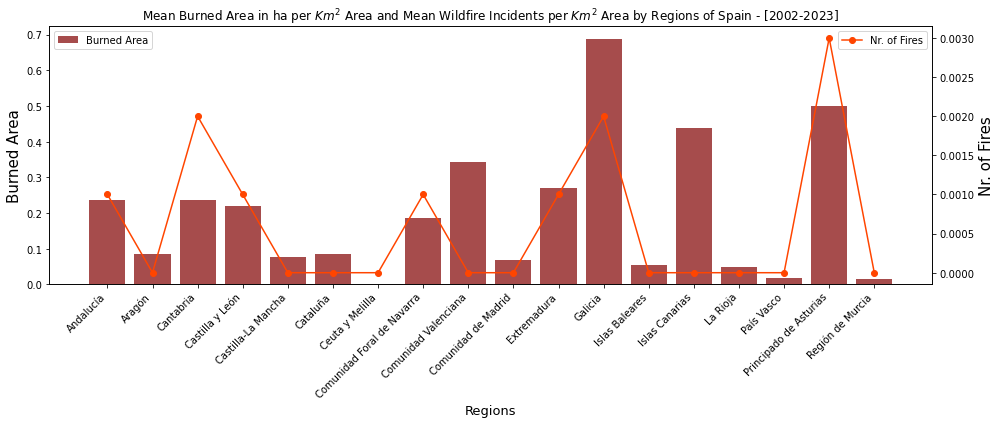

In [61]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the bar chart
ax1.bar(spain_avgburnedarea_avgfires_byregion_02_23['Region'], spain_avgburnedarea_avgfires_byregion_02_23['Burned Area'], color='maroon', alpha=0.7, label='Burned Area')
ax1.set_xlabel('Regions',fontsize=13)
ax1.set_ylabel('Burned Area',fontsize=15)
ax1.set_xticklabels(spain_avgburnedarea_avgfires_byregion_02_23['Region'], rotation=45, ha='right')

# Create a second y-axis to plot the line chart
ax2 = ax1.twinx()
ax2.plot(spain_avgburnedarea_avgfires_byregion_02_23['Region'], spain_avgburnedarea_avgfires_byregion_02_23['Nr. of Fires'], color='orangered', marker='o', label='Nr. of Fires')
ax2.set_ylabel('Nr. of Fires',fontsize=15)

# Add title and legend
plt.title('Mean Burned Area in ha per $Km^{2}$ Area and Mean Wildfire Incidents per $Km^{2}$ Area by Regions of Spain - [2002-2023]')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

by burned area galicia is most critical region when we consider burnt area due to wildfires happened in spain between 2002-2023.
Source:https://gwis.jrc.ec.europa.eu/apps/country.profile/downloads

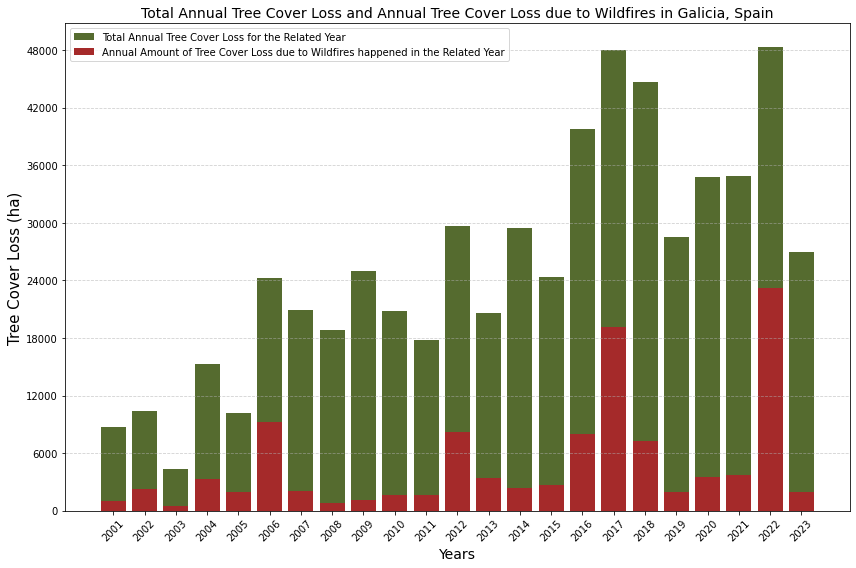

In [92]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the total loss bars
ax.bar(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__ha'], label='Total Annual Tree Cover Loss for the Related Year', color='darkolivegreen')

# Plotting the loss from fires as an overlay, using the same base x-coordinates
ax.bar(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss_from_fires__ha'], label='Annual Amount of Tree Cover Loss due to Wildfires happened in the Related Year', color='brown')

# Adding labels, title, and gridlines
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Tree Cover Loss (ha)', fontsize=15)
ax.set_title('Total Annual Tree Cover Loss and Annual Tree Cover Loss due to Wildfires in Galicia, Spain', fontsize=14)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)  # Adding horizontal gridlines

# Adjusting the x-axis ticks
ax.set_xticks(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'])
ax.set_xticklabels(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], rotation=45)

# Increasing the number of y-axis ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # 10 tick marks on the y-axis

# Display the plot
plt.tight_layout()
plt.show()

Total amount of Tree cover loss and  inside of it the amount of tree cover loss due to wildfires are represented like this.
Source: https://www.globalforestwatch.org/dashboards/global/

In [129]:
# Filter the data based on the criteria
filtered = galicia_burned_area_byfires_03_18[(galicia_burned_area_byfires_03_18['longitude'] < -6.73) &
                             (galicia_burned_area_byfires_03_18['longitude'] > -9.3) &
                             (galicia_burned_area_byfires_03_18['latitude'] > 41.8) &
                             (galicia_burned_area_byfires_03_18['latitude'] < 43.8) &
                             (galicia_burned_area_byfires_03_18['burnt_area'] > 100)]

# Create a map centered around Galicia
map_galicia = folium.Map(location=[42.8, -8.015], zoom_start=8)
folium.TileLayer('cartodbdark_matter').add_to(map_galicia)

# Define the color mapping for each 'idprovincia'
color_map = {
    15: 'red',      # A Coruña
    27: 'blue',     # Lugo
    32: 'purple',   # Ourense
    36: 'yellow'    # Pontevedra
}

# Add circles for wildfire incidents
for idx, row in filtered.iterrows():
    color = color_map.get(row['idprovincia'], 'blue')  # Use 'blue' as default if idprovincia is not in color_map
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['burnt_area'] * 1,  # Adjust the multiplier for better visibility
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5
    ).add_to(map_galicia)

# Add custom legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 130px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white; opacity: 0.9;
     ">
     <b>Legend</b>
     <br>
     <i style="background: red; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>A Coruña
     <br>
     <i style="background: blue; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Lugo
     <br>
     <i style="background: purple; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Ourense
     <br>
     <i style="background: yellow; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Pontevedra
     </div>
     '''
map_galicia.get_root().html.add_child(folium.Element(legend_html))
    
    
# Display the map
map_galicia